# Movie Genre Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import os
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

In [2]:
custom_download_path = '/kaggle/working/nltk_data'
os.makedirs(custom_download_path, exist_ok=True)
nltk.data.path.append(custom_download_path)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\solap\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\solap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\solap\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
md=pd.read_csv("Desktop/Codsoft/datasets/train_data.txt",sep=':::',engine='python',names=['Title','Genre','Description'])

In [4]:
md.head(10)

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...
8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...
9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss..."
10,Spirits (2014/I),horror,Four high school students embark on a terrify...


In [5]:
print("shape",md.shape)

shape (54214, 3)


In [6]:
md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [7]:
md.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [8]:
dupe = md.duplicated().sum()
dupe

0

In [9]:
md.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [10]:
md['Genre'].value_counts()

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: Genre, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, ' drama '),
  Text(1, 0, ' documentary '),
  Text(2, 0, ' comedy '),
  Text(3, 0, ' short '),
  Text(4, 0, ' horror '),
  Text(5, 0, ' thriller '),
  Text(6, 0, ' action '),
  Text(7, 0, ' western '),
  Text(8, 0, ' reality-tv '),
  Text(9, 0, ' family '),
  Text(10, 0, ' adventure '),
  Text(11, 0, ' music '),
  Text(12, 0, ' romance '),
  Text(13, 0, ' sci-fi '),
  Text(14, 0, ' adult '),
  Text(15, 0, ' crime '),
  Text(16, 0, ' animation '),
  Text(17, 0, ' sport '),
  Text(18, 0, ' talk-show '),
  Text(19, 0, ' fantasy '),
  Text(20, 0, ' mystery '),
  Text(21, 0, ' musical '),
  Text(22, 0, ' biography '),
  Text(23, 0, ' history '),
  Text(24, 0, ' game-show '),
  Text(25, 0, ' news '),
  Text(26, 0, ' war ')])

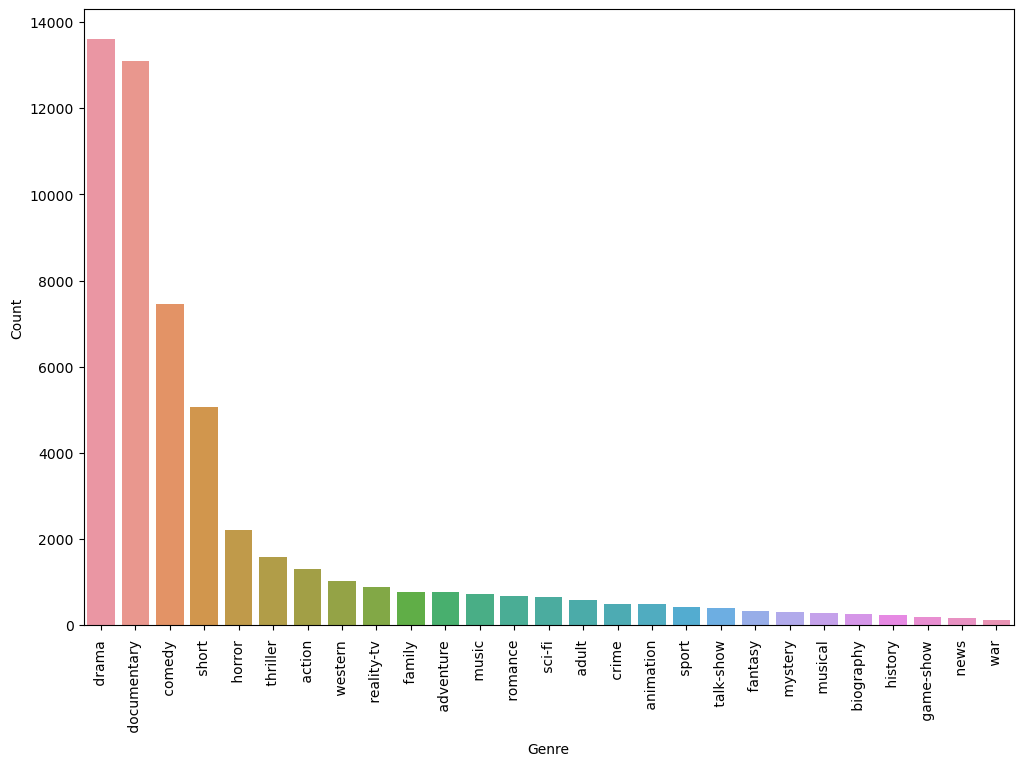

In [11]:
plt.figure(figsize=(12,8))
counts = md.Genre.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation='vertical')

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
label_encode = LabelEncoder()

In [14]:
md['genre_count'] = label_encode.fit_transform(md['Genre'])

In [15]:
md.head()

,Title,Genre,Description,genre_count
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,8
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,24
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,8
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,8


In [16]:
ps=PorterStemmer()

In [17]:
def transform_text(text):
    # Lowercase the text
    text = text.lower()

    # Tokenization
    text = nltk.word_tokenize(text)

    # Remove special characters and keep alphanumeric words
    text = [i for i in text if i.isalnum()]

    # Remove stopwords and punctuation
    stop_words = set(stopwords.words("english"))
    text = [i for i in text if i not in stop_words and i not in string.punctuation]

    # Stemming using Porter Stemmer
    text = [ps.stem(i) for i in text]

    return " ".join(text)

In [18]:
nltk.download("punkt")
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\solap\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\solap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
import string

In [20]:
md["transformed"] = md["Description"].apply(transform_text)

In [21]:
md.head()

,Title,Genre,Description,genre_count,transformed
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,8,listen convers doctor parent oscar learn nobod...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,24,brother sister past incestu relationship curre...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1,bu empti student field trip museum natur histo...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,8,help unemploy father make end meet edith twin ...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,8,film titl refer bodi ground zero also state na...


In [22]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=9000)

In [23]:
X_data = tfidf.fit_transform(md["transformed"]).toarray()

In [24]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_data = scale.fit_transform(X_data)

In [25]:
X_data.shape

(54214, 9000)

In [26]:
y_train = md.Genre
y_train

1               drama 
2            thriller 
3               adult 
4               drama 
5               drama 
             ...      
54210          comedy 
54211          horror 
54212     documentary 
54213          comedy 
54214         history 
Name: Genre, Length: 54214, dtype: object

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_data,y_train,test_size = 0.2, random_state=2)

In [28]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score

In [29]:
lrc = LogisticRegression(solver = 'liblinear',penalty = 'l1')
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [30]:
mnb.fit(X_train,Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2,average='micro'))
print(f1_score(Y_test, y_pred2, average="micro"))

0.5492944756986073
[[  71    1    0    0    0   30    0   30  105    0    0    0    0    9
     0    0    0    0    0    0    1    6    3    0    8    0    4]
 [   1   33   10    0    0   53    0    4   25    0    0    0    0    3
     1    0    0    0    0    0    0    5    0    0    1    0    0]
 [   7    9   19    0    0   24    0   39   35    1    0    0    0    4
     0    0    0    0    1    0    0    6    0    0    1    0    2]
 [   7    0    0    0    0   21    0   25   18    2    0    0    0    5
     0    0    0    0    0    0    2   10    0    0    0    0    0]
 [   0    0    0    0    0    5    0   33   10    0    0    0    0    1
     0    0    0    0    0    0    0    1    0    0    1    0    0]
 [  12    0    0    0    0  843    0  104  470    1    0    0    0   10
     7    0    0    0    3    0    0   26    0    1    1    0    1]
 [   8    0    0    0    0   22    0   10   58    0    0    0    0    8
     0    0    0    0    0    0    0    0    0    0    9    0    1]
 

In [31]:
gnb.fit(X_train,Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1,average='macro'))
print(f1_score(Y_test, y_pred1, average="micro"))

0.21202619201328046
[[ 37   4   9   4   1  31   3  23  31   6   5   0   1  15   1   1   5   0
    0   4   4  52   2   1  23   0   5]
 [  3  21   6   0   0  31   0   2  10   0   0   0   0  18   1   1   1   0
    0   1   0  34   0   0   7   0   0]
 [  8   3  13   2   1  17   0  14  11   2   1   0   0  21   1   0   0   0
    0   4   3  34   2   0  10   0   1]
 [  6   0   5   3   1  10   2   7   6   5   1   0   0   6   1   0   3   0
    2   1   2  24   0   0   5   0   0]
 [  3   0   1   0   0   8   0   9   8   0   0   0   0   3   4   0   0   0
    1   0   0  12   0   0   2   0   0]
 [ 56  17  34  12   4 405  19  52 111  34   8   0   2  95  15   7  10   1
   33  41  10 362   3   4 126   1  17]
 [ 13   2   3   2   0  20   9   4  14   5   0   0   0   9   0   0   1   0
    1   1   3  15   0   0  10   0   4]
 [ 73   5  32  18  22 194  16 804 107  43   5   0   4  99  47   1   7   0
   54  18  22 923  17   9  95   0   0]
 [133  28  55  21  12 453  44 194 359  45  19   0  15 181  13  15  26   0
  

In [32]:
bnb.fit(X_train,Y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3,average='macro'))
print(f1_score(Y_test, y_pred3, average="micro"))

0.532325002305635
[[ 115    0    2    0    0   28    1   16   46    1    0    0    0    6
     1    0    0    0    0    5    7   20    2    0   16    0    2]
 [   1   52   10    0    0   39    0    1    7    0    0    0    0    2
     1    0    0    0    0    0    0   20    0    0    2    0    1]
 [  10   14   25    1    0   19    0   17   23    0    2    0    0    7
     0    0    0    0    6    0    2   18    0    0    1    0    3]
 [   5    0    4    9    0   22    0   10   10    3    1    0    0    2
     0    0    0    0    1    0    4   19    0    0    0    0    0]
 [   1    0    0    0    2    3    0   26    4    0    1    0    0    2
     2    1    0    0    0    1    0    7    0    0    1    0    0]
 [  22    4    3    4    1  929    6   38  227    5    0    0    0   15
    11    1    9    0   14   37    2  120    1    6   17    0    7]
 [  19    0    0    0    0   24    4    3   26    0    0    0    0    8
     0    0    2    0    0    0    0    6    0    0   23    0    1]
 [

In [33]:
lrc.fit(X_train,Y_train)
y_pred4 = lrc.predict(X_test)
print(accuracy_score(Y_test,y_pred4))
print(confusion_matrix(Y_test,y_pred4))
print(precision_score(Y_test,y_pred4,average='micro'))
print(f1_score(Y_test, y_pred4, average="macro"))

0.5770543207599372
[[  75    0    2    1    0   31    4   17   85    3    0    0    1    9
     0    0    0    0    0    0    5   11    4    0   12    1    7]
 [   1   47    8    0    0   31    0    6   23    0    0    0    0    3
     0    0    0    0    0    0    0   14    0    0    2    0    1]
 [   7    6   29    1    0   23    0   24   34    1    1    0    0    1
     0    0    0    0    5    0    2   10    0    0    2    0    2]
 [   6    0    1   17    0   15    0   11   17    6    1    0    0    3
     0    0    0    0    0    0    2   11    0    0    0    0    0]
 [   0    0    0    0    0    6    0   32   10    0    0    0    0    1
     0    0    0    0    0    0    0    1    0    0    1    0    0]
 [  14    4    0    0    0  877    2   64  406    2    1    0    0   20
     1    2    0    0    5    2    5   63    1    5    3    1    1]
 [  17    0    0    0    0   19    4    8   45    0    0    0    0   10
     0    0    0    0    0    0    0    3    1    0    8    0    1]
 

In [34]:
new_movie_description  = "Muthuvel Pandian is a retired jailer living happily with his wife, son, daughter-in-law and grandson. His son who is an Assistant Commissioner of police goes missing while investigating the case of missing temple idols and is presumed dead. The story is about how Muthuvel Pandian goes toe to toe against Varma, the mastermind behind large-scale smuggling of temple idols and treasures, and avenges his son.."
SMS_transform = transform_text(new_movie_description)
vector_input = tfidf.transform([SMS_transform])
predicted_genre = lrc.predict(vector_input)
print("Predicted Genre:", predicted_genre[0])

Predicted Genre:  drama 


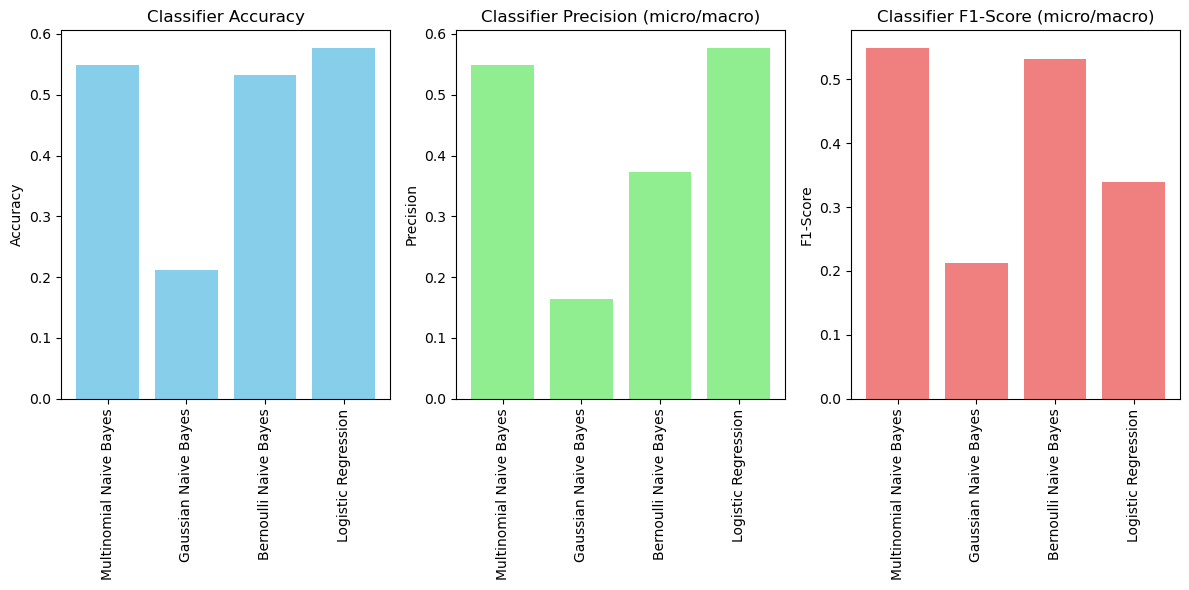

In [37]:
# Classifier names and their corresponding metrics
classifiers = ['Multinomial Naive Bayes', 'Gaussian Naive Bayes', 'Bernoulli Naive Bayes', 'Logistic Regression']
accuracy_scores = [accuracy_score(Y_test, y_pred2), accuracy_score(Y_test, y_pred1), accuracy_score(Y_test, y_pred3), accuracy_score(Y_test, y_pred4)]
precision_scores = [precision_score(Y_test, y_pred2, average='micro'), precision_score(Y_test, y_pred1, average='macro'), precision_score(Y_test, y_pred3, average='macro'), precision_score(Y_test, y_pred4, average='micro')]
f1_scores = [f1_score(Y_test, y_pred2, average='micro'), f1_score(Y_test, y_pred1, average='micro'), f1_score(Y_test, y_pred3, average='micro'), f1_score(Y_test, y_pred4, average='macro')]

# Create subplots for each metric
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.bar(classifiers, accuracy_scores, color='skyblue')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy')
plt.xticks(rotation='vertical')
plt.subplot(1, 3, 2)
plt.bar(classifiers, precision_scores, color='lightgreen')
plt.ylabel('Precision')
plt.title('Classifier Precision (micro/macro)')
plt.xticks(rotation='vertical')
plt.subplot(1, 3, 3)
plt.bar(classifiers, f1_scores, color='lightcoral')
plt.ylabel('F1-Score')
plt.title('Classifier F1-Score (micro/macro)')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

predicted_genre_cleaned = predicted_genre[0].strip()